In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
analytics_data = pd.read_json('lastcallstudios-c8991-default-rtdb-export.json')

# Display the first few rows of the dataframe
df_head = analytics_data.head()
df_head

,analytics,analytics_v2,analytics_v3,analytics_v4,analytics_v5,analytics_v6,analytics_v7
01d28a36-ae56-487f-abc0-7008d17e3b82,"{'ballsKnockedOff': 5, 'bulletCollisions': 0, ...",NaN,NaN,NaN,NaN,NaN,NaN
026ff44b-3a11-4fb0-a977-c072a67d1a2e,"{'ballsKnockedOff': 6, 'bulletCollisions': 0, ...",NaN,NaN,NaN,NaN,NaN,NaN
050ee2d2-dd9d-4925-afd6-8b8fe93601c8,"{'ballsKnockedOff': 4, 'bulletCollisions': 0, ...",NaN,NaN,NaN,NaN,NaN,NaN
068083c9-e93e-4c48-b801-62574e291227,"{'ballsKnockedOff': 2, 'bulletCollisions': 0, ...",NaN,NaN,NaN,NaN,NaN,NaN
06c0f29f-c518-4cbd-a91f-cd81875f3b7d,"{'ballsKnockedOff': 0, 'bulletCollisions': 0, ...",NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Convert the lists in 'analytics_v5' to dictionaries
analytics_data['analytics_v6'] = analytics_data['analytics_v6'].apply(lambda x: {i: x[i] for i in range(len(x))} if isinstance(x, list) else x)

# Try flattening the 'analytics_v5' column again
analytics_data_flat = pd.json_normalize(analytics_data['analytics_v6'])

# Display the first few rows of the flattened dataframe
df_head_flat = analytics_data_flat.head()
df_head_flat

,ballsKnockedByGhost,ballsKnockedByPlayer,ballsKnockedOff,ballsPerPocket,barrierGhostCollisions,barrierPlayerCollisions,bulletCollisions,currentLevel,curvedShotsTaken,gameSessionId,...,levelSessionId,levelState,powerup,shots,shotsTaken,timeStarted,timeTaken,timeUpdated,totalScore,levelName
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Remove rows with missing values
analytics_data_clean = analytics_data_flat.dropna()

analytics_data_clean = analytics_data_clean[analytics_data_clean.currentLevel != -1]
analytics_data_clean = analytics_data_clean[analytics_data_clean.currentLevel != 0]

# Display the first few rows of the cleaned dataframe
df_head_clean = analytics_data_clean.head()
df_head_clean

,ballsKnockedByGhost,ballsKnockedByPlayer,ballsKnockedOff,ballsPerPocket,barrierGhostCollisions,barrierPlayerCollisions,bulletCollisions,currentLevel,curvedShotsTaken,gameSessionId,...,levelSessionId,levelState,powerup,shots,shotsTaken,timeStarted,timeTaken,timeUpdated,totalScore,levelName
1466,2.0,1.0,2.0,"[2, 0, 1, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,1.0,0.0,1e33a07b-4344-4a3f-b335-313e4880f2cb,...,0026d2c4-93b9-4bb3-8262-cecae01d8937,0.0,0.0,"[{'CurvedShot': False, 'DirectionX': -0.511703...",2.0,1.699988e+09,12.0,1.699988e+09,6.0,Level1
1468,0.0,0.0,1.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,10.0,0.0,89c0b15c-c7cb-49f4-b5e4-0a42785c702e,...,00d014cc-34d7-49b3-abf1-35051845e57f,0.0,2.0,"[{'CurvedShot': False, 'DirectionX': -0.641645...",6.0,1.700244e+09,22.0,1.700244e+09,2.0,Level10
1476,0.0,0.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,10.0,0.0,0510c211-71dc-40f7-9100-202c5a317977,...,01ce8f22-a049-449b-a8b4-596bea217e65,0.0,1.0,"[{'CurvedShot': False, 'DirectionX': 0.9714845...",2.0,1.699992e+09,4.0,1.699992e+09,0.0,Level10
1479,0.0,0.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,1.0,0.0,b00bdb61-40bc-4a3b-8f50-03658996f967,...,02423fec-9e47-4d33-8584-d7e44f9f35e7,0.0,0.0,"[{'CurvedShot': False, 'DirectionX': -0.634852...",1.0,1.699989e+09,1.0,1.699989e+09,0.0,Level1
1480,3.0,0.0,2.0,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]",3.0,0.0,0.0,9.0,0.0,58ca331c-e005-42d2-8ba3-ffe5190082e9,...,02476736-7277-4e04-b574-93ad7e8ac82a,0.0,0.0,"[{'DirectionX': -0.11349284600000001, 'Directi...",4.0,1.699772e+09,26.0,1.699772e+09,53.0,Level9


In [5]:
analytics_data_clean = analytics_data_flat.dropna(subset=['barrierGhostCollisions', 'currentLevel', 'barrierPlayerCollisions'])

analytics_data_clean['currentLevel'] = analytics_data_clean['currentLevel'].astype(int)

# Display the first few rows of the cleaned dataframe
df_head_clean = analytics_data_clean.head()
df_head_clean

,ballsKnockedByGhost,ballsKnockedByPlayer,ballsKnockedOff,ballsPerPocket,barrierGhostCollisions,barrierPlayerCollisions,bulletCollisions,currentLevel,curvedShotsTaken,gameSessionId,...,levelSessionId,levelState,powerup,shots,shotsTaken,timeStarted,timeTaken,timeUpdated,totalScore,levelName
1463,2.0,1.0,1.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,0,1.0,f1db3cdb-77b6-4639-9be1-1c2295813bc3,...,0000fb9a-43e7-425d-b2d3-1322a2502dc0,0.0,0.0,"[{'DirectionX': 0.1337609, 'DirectionY': 0.991...",2.0,1.699402e+09,17.0,1.699402e+09,208.0,NaN
1464,1.0,0.0,2.0,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0]",3.0,1.0,0.0,0,0.0,f7a95d43-635f-45f1-ae8e-ffc399099ac9,...,0017e89f-f398-49cc-98e1-923f1037584d,2.0,0.0,"[{'DirectionX': -0.105139494, 'DirectionY': 0....",7.0,1.699669e+09,43.0,1.699670e+09,176.0,NaN
1465,1.0,1.0,2.0,"[0, 2, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,0,0.0,906ef5f6-8371-4c40-92b3-23e026ab84dd,...,00257855-7582-42d8-a0e2-f923b9ce471d,0.0,0.0,"[{'DirectionX': 0.8234231470000001, 'Direction...",2.0,1.699480e+09,22.0,1.699480e+09,28.0,NaN
1466,2.0,1.0,2.0,"[2, 0, 1, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,1,0.0,1e33a07b-4344-4a3f-b335-313e4880f2cb,...,0026d2c4-93b9-4bb3-8262-cecae01d8937,0.0,0.0,"[{'CurvedShot': False, 'DirectionX': -0.511703...",2.0,1.699988e+09,12.0,1.699988e+09,6.0,Level1
1467,2.0,0.0,3.0,"[0, 2, 1, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,0,0.0,105f8bbf-975a-4c44-9959-c0ccb93f8acc,...,00768155-1edd-44dd-839c-23d46ed28806,0.0,0.0,"[{'DirectionX': 0.80114156, 'DirectionY': 0.59...",6.0,1.699645e+09,38.0,1.699646e+09,92.0,NaN


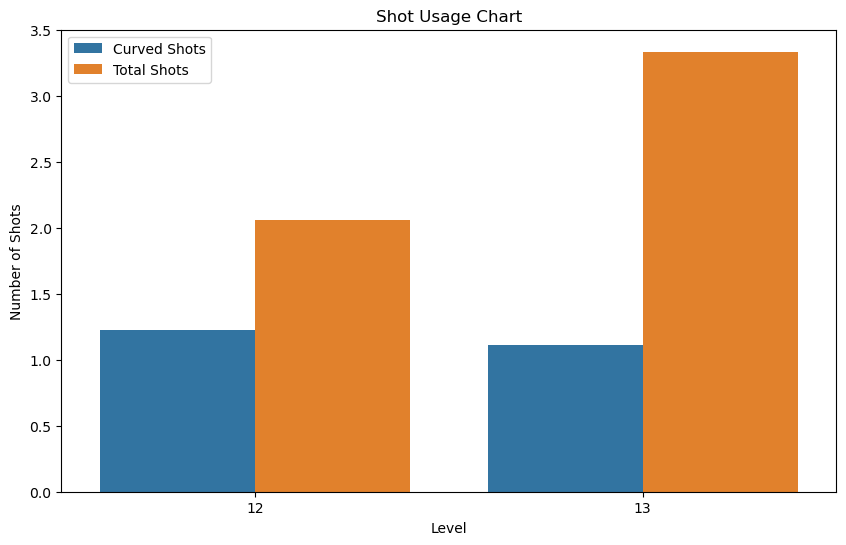

In [6]:
filtered_data = analytics_data_clean[analytics_data_clean['currentLevel'].isin([12, 13])]

melted_data = filtered_data.melt(id_vars='currentLevel', value_vars=['curvedShotsTaken', 'shotsTaken'], var_name='Shot Type', value_name='Count')


# Plot the graph with renamed legend
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='currentLevel', y='Count', hue='Shot Type', data=melted_data, edgecolor=(0, 0, 0, 0), ci=None)
plt.xlabel('Level')
plt.ylabel('Number of Shots')
plt.title('Shot Usage Chart')

# Rename the legend
handles, labels = bar_plot.get_legend_handles_labels()
bar_plot.legend(handles, ['Curved Shots', 'Total Shots'])

plt.show()

In [7]:
filtered_data

,ballsKnockedByGhost,ballsKnockedByPlayer,ballsKnockedOff,ballsPerPocket,barrierGhostCollisions,barrierPlayerCollisions,bulletCollisions,currentLevel,curvedShotsTaken,gameSessionId,...,levelSessionId,levelState,powerup,shots,shotsTaken,timeStarted,timeTaken,timeUpdated,totalScore,levelName
1496,2.0,1.0,2.0,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,13,1.0,3ce2e6db-cd13-4075-92a7-148e5e0bdbfe,...,039c5e96-8b46-4d9c-98c6-31e99b72493d,2.0,0.0,"[{'DirectionX': -0.22369675300000003, 'Directi...",2.0,1.699459e+09,23.0,1.699459e+09,70.0,Level13
1511,0.0,0.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,13,0.0,87e96fe0-d9e3-4f1b-b414-82618972b190,...,05697d01-fc3c-4afa-a2ed-b2770dcf9bce,0.0,0.0,"[{'CurvedShot': False, 'DirectionX': 0.6893438...",1.0,1.700001e+09,3.0,1.700001e+09,0.0,Level13
1538,0.0,0.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,13,1.0,1e33a07b-4344-4a3f-b335-313e4880f2cb,...,08d674d9-da4d-4163-93c8-ce2835b06a5c,0.0,0.0,"[{'CurvedShot': True, 'DirectionX': -0.3330468...",1.0,1.699989e+09,5.0,1.699989e+09,0.0,Level13
1590,6.0,0.0,1.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,12,0.0,3ce2e6db-cd13-4075-92a7-148e5e0bdbfe,...,0e63ae09-0a99-4c0e-9c1d-726e2fc43905,2.0,0.0,"[{'DirectionX': -0.522617638, 'DirectionY': 0....",4.0,1.699459e+09,48.0,1.699459e+09,58.0,Level12
1630,1.0,0.0,1.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,12,1.0,48759601-4930-43e0-aa7d-60bfdab84013,...,13dff5af-ae75-48f4-9cfc-f1b478c64614,0.0,0.0,"[{'DirectionX': 0.15108527200000002, 'Directio...",2.0,1.699821e+09,10.0,1.699821e+09,65.0,Level12
1699,0.0,1.0,1.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,12,1.0,c8e7211d-75a3-4d3a-b866-bbd13f7a1e7f,...,1be34050-5dec-4d63-8ad0-cf0a8a831aa8,0.0,0.0,"[{'CurvedShot': True, 'DirectionX': 0.16864612...",1.0,1.699988e+09,12.0,1.699988e+09,8.0,Level12
1730,1.0,1.0,2.0,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,13,1.0,6b287a48-4a88-49d8-bcff-688d9c4972a8,...,1fc662dd-78a1-4821-9c87-e4401c1536c2,2.0,0.0,"[{'DirectionX': -0.16100919200000002, 'Directi...",2.0,1.699813e+09,20.0,1.699813e+09,102.0,Level13
1758,0.0,1.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,12,2.0,fd5067ec-b872-4d98-901b-015ab4289570,...,22b2685f-4401-433b-bb0d-5afca742ce84,1.0,0.0,"[{'DirectionX': 0.0523044243, 'DirectionY': 0....",3.0,1.699742e+09,24.0,1.699742e+09,0.0,Level12
1899,2.0,1.0,1.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,13,2.0,58ca331c-e005-42d2-8ba3-ffe5190082e9,...,345827c1-1b1d-4f64-8771-e01d90e03dad,1.0,0.0,"[{'DirectionX': -0.37510689999999997, 'Directi...",4.0,1.699772e+09,47.0,1.699772e+09,65.0,Level13
1902,0.0,1.0,1.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,12,1.0,1e33a07b-4344-4a3f-b335-313e4880f2cb,...,34abc0ab-27e4-469e-918c-dfdb9e2a247b,2.0,0.0,"[{'CurvedShot': True, 'DirectionX': 0.17688173...",1.0,1.699989e+09,10.0,1.699989e+09,81.0,Level12


In [8]:
len(filtered_data)

36

### New Analytic

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import json

# Load the JSON data to inspect its structure
with open('lastcallstudios-c8991-default-rtdb-export.json', 'r') as file:
    data = json.load(file)

# Print out the structure of the JSON file
print(json.dumps(data, indent=4, sort_keys=True))

# Check if 'analytics_v6' is a key at the top level of the JSON structure
'analytics_v6' in data

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



True

In [12]:
# Now that we know 'analytics_v6' is a top-level key, let's extract its contents
analytics_v6_data = data['analytics_v6']

# Since the structure of 'analytics_v6' might be complex, let's try to understand it better
# We will print the type of 'analytics_v6_data' and the type of its first element (if it's a list)
print('Type of analytics_v6_data:', type(analytics_v6_data))
if isinstance(analytics_v6_data, list) and len(analytics_v6_data) > 0:
    print('Type of the first element in analytics_v6_data:', type(analytics_v6_data[0]))
    print('Keys of the first element in analytics_v6_data:', analytics_v6_data[0].keys())
else:
    print('analytics_v6_data is not a list or is empty.')

Type of analytics_v6_data: <class 'dict'>
analytics_v6_data is not a list or is empty.


In [13]:
# Let's print the keys of the 'analytics_v6' dictionary to understand its structure
#print('Keys of analytics_v6_data:', list(analytics_v6_data.keys()))

# If the keys are session IDs or similar, we will try to access one of them to see the structure
first_key = next(iter(analytics_v6_data))
#print('Type of the first item in analytics_v6_data by key:', type(analytics_v6_data[first_key]))
#print('Keys of the first item in analytics_v6_data by key:', analytics_v6_data[first_key].keys())

## Level 12

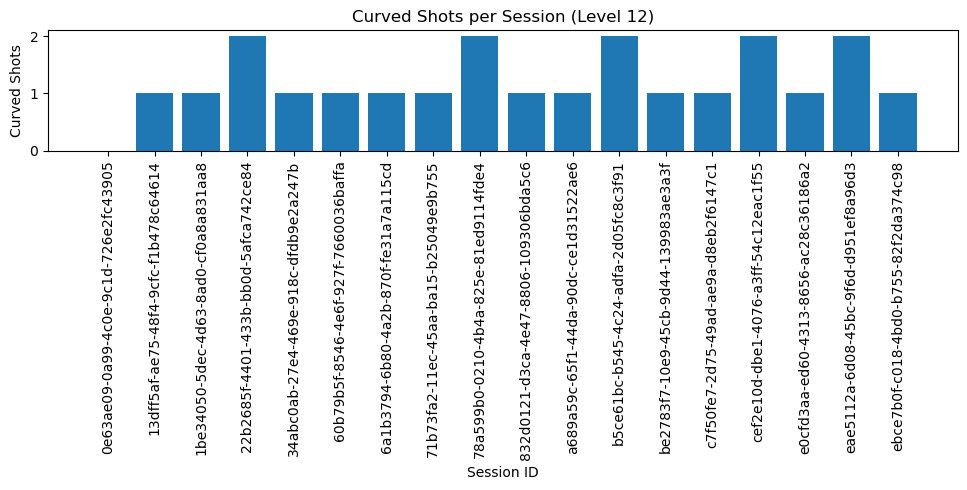

In [14]:
import matplotlib.pyplot as plt

# Filter the sessions where 'currentLevel' is 12 and extract the required information
sessions_level_12 = {session_id: details for session_id, details in analytics_v6_data.items() if details.get('currentLevel') == 12}

# Create a list of tuples with 'gameSessionId' and 'curvedShotsTaken'
session_curved_shots = [(session_id, details.get('curvedShotsTaken', 0)) for session_id, details in sessions_level_12.items()]

# Convert the list of tuples into a DataFrame
session_curved_shots_df = pd.DataFrame(session_curved_shots, columns=['SessionID', 'CurvedShots'])

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(session_curved_shots_df['SessionID'], session_curved_shots_df['CurvedShots'])
plt.xlabel('Session ID')
plt.ylabel('Curved Shots')
plt.title('Curved Shots per Session (Level 12)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
# Extract the 'shots' array for each session where 'currentLevel' is 12
sessions_shots = {session_id: details['shots'] for session_id, details in analytics_v6_data.items() if details.get('currentLevel') == 12}

# Create a DataFrame to hold the shot type sequence for each session
shot_sequences = []

# Iterate over the sessions and their shots
for session_id, shots in tqdm(sessions_shots.items()):
    # For each shot, determine if it was a CurvedShot or not
    for shot in shots:
        shot_type = 'CurvedShot' if shot.get('CurvedShot', False) else 'Not CurvedShot'
        shot_sequences.append((session_id, shot_type))

# Convert the list of tuples into a DataFrame
shot_sequences_df = pd.DataFrame(shot_sequences, columns=['SessionID', 'ShotType'])

# Display the head of the DataFrame
shot_sequences_df.head()

  0%|          | 0/18 [00:00<?, ?it/s]

,SessionID,ShotType
0,0e63ae09-0a99-4c0e-9c1d-726e2fc43905,Not CurvedShot
1,0e63ae09-0a99-4c0e-9c1d-726e2fc43905,Not CurvedShot
2,0e63ae09-0a99-4c0e-9c1d-726e2fc43905,Not CurvedShot
3,0e63ae09-0a99-4c0e-9c1d-726e2fc43905,Not CurvedShot
4,0e63ae09-0a99-4c0e-9c1d-726e2fc43905,Not CurvedShot


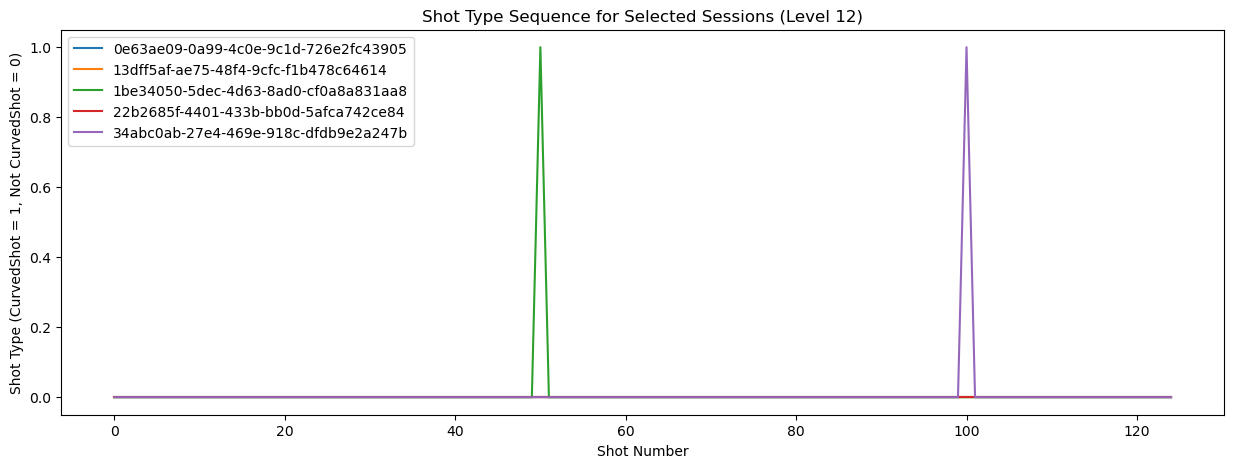

In [16]:
# Since there might be many sessions, we will plot the first few to keep the graph readable
# Select a subset of sessions to plot
unique_sessions = shot_sequences_df['SessionID'].unique()[:5]
subset_shot_sequences_df = shot_sequences_df[shot_sequences_df['SessionID'].isin(unique_sessions)]

# Pivot the DataFrame to have one column per session with shot types as values
pivot_df = subset_shot_sequences_df.pivot(columns='SessionID', values='ShotType')

# Replace 'CurvedShot' with 1 and 'Not CurvedShot' with 0 for plotting
pivot_df = pivot_df.applymap(lambda x: 1 if x == 'CurvedShot' else 0)

# Plotting
plt.figure(figsize=(15, 5))
for session in unique_sessions:
    plt.plot(pivot_df.index, pivot_df[session], label=session)
plt.xlabel('Shot Number')
plt.ylabel('Shot Type (CurvedShot = 1, Not CurvedShot = 0)')
plt.title('Shot Type Sequence for Selected Sessions (Level 12)')
plt.legend()
plt.show()

Plotting sessions:   0%|          | 0/18 [00:00<?, ?it/s]

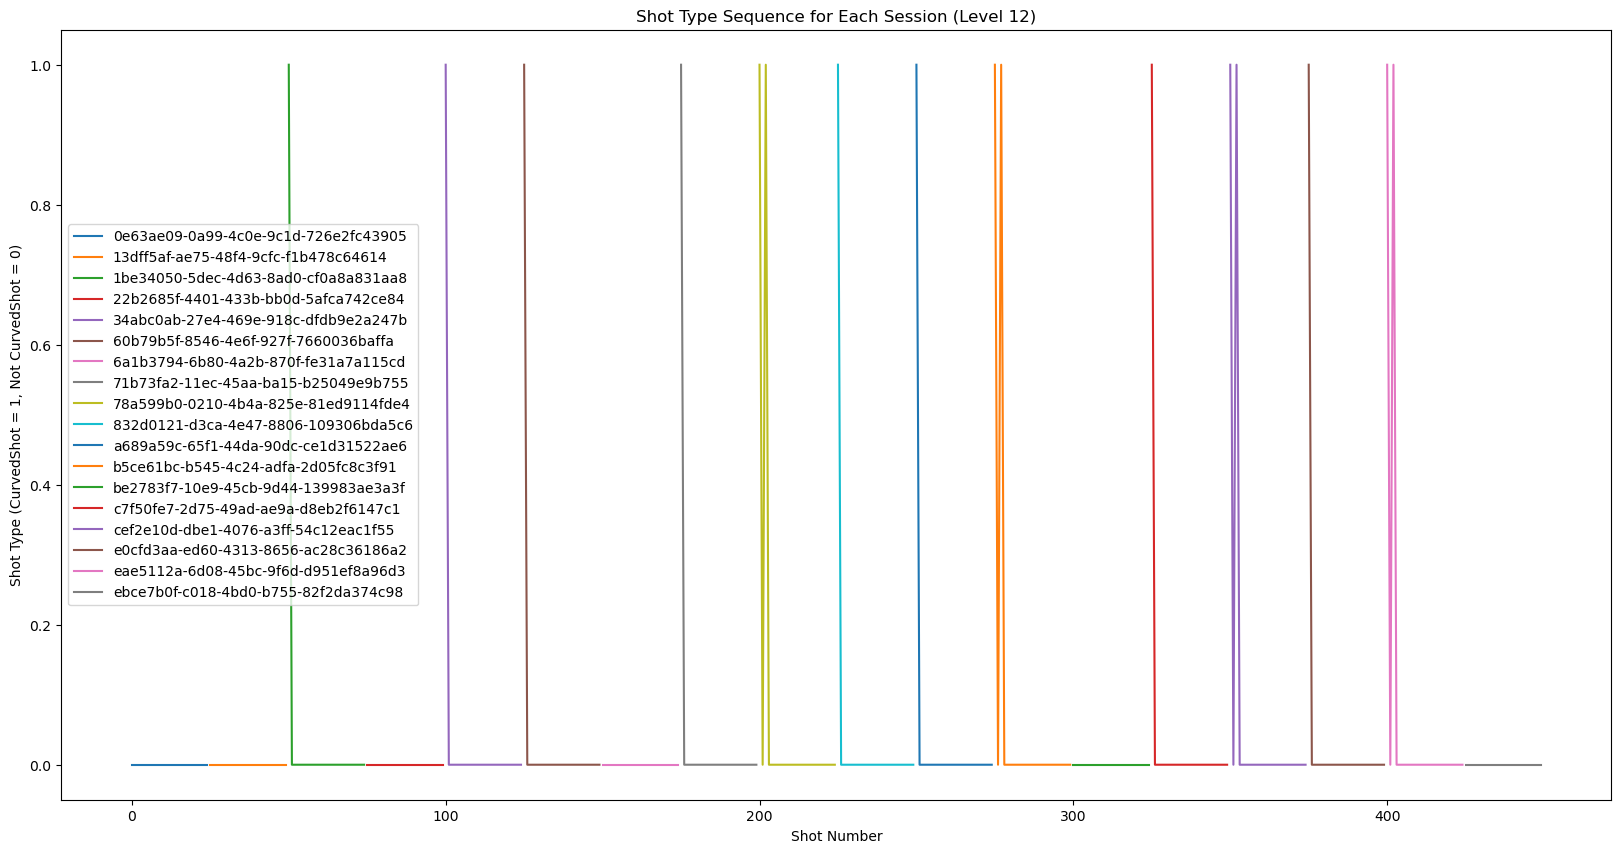

In [17]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# We will plot individual lines for each session
# First, we need to get a list of all unique session IDs
unique_session_ids = shot_sequences_df['SessionID'].unique()

# Set up the plot
plt.figure(figsize=(20, 10))

# Plot a line for each session
for session_id in tqdm(unique_session_ids, desc='Plotting sessions'):
    # Filter the DataFrame for the current session
    session_data = shot_sequences_df[shot_sequences_df['SessionID'] == session_id]
    # Convert 'CurvedShot' to 1 and 'Not CurvedShot' to 0
    session_data['ShotType'] = session_data['ShotType'].map({'CurvedShot': 1, 'Not CurvedShot': 0})
    # Plot
    plt.plot(session_data.index, session_data['ShotType'], label=session_id)

# Finalize the plot
plt.xlabel('Shot Number')
plt.ylabel('Shot Type (CurvedShot = 1, Not CurvedShot = 0)')
plt.title('Shot Type Sequence for Each Session (Level 12)')
plt.legend()
plt.show()

## Level 13

In [18]:
# Extract the 'shots' array for each session where 'currentLevel' is 12
sessions_shots = {session_id: details['shots'] for session_id, details in analytics_v6_data.items() if details.get('currentLevel') == 13}

# Create a DataFrame to hold the shot type sequence for each session
shot_sequences = []

# Iterate over the sessions and their shots
for session_id, shots in tqdm(sessions_shots.items()):
    # For each shot, determine if it was a CurvedShot or not
    for shot in shots:
        shot_type = 'CurvedShot' if shot.get('CurvedShot', False) else 'Not CurvedShot'
        shot_sequences.append((session_id, shot_type))

# Convert the list of tuples into a DataFrame
shot_sequences_df = pd.DataFrame(shot_sequences, columns=['SessionID', 'ShotType'])

# Display the head of the DataFrame
shot_sequences_df.head()

  0%|          | 0/18 [00:00<?, ?it/s]

,SessionID,ShotType
0,039c5e96-8b46-4d9c-98c6-31e99b72493d,Not CurvedShot
1,039c5e96-8b46-4d9c-98c6-31e99b72493d,Not CurvedShot
2,039c5e96-8b46-4d9c-98c6-31e99b72493d,Not CurvedShot
3,039c5e96-8b46-4d9c-98c6-31e99b72493d,Not CurvedShot
4,039c5e96-8b46-4d9c-98c6-31e99b72493d,Not CurvedShot


Plotting sessions:   0%|          | 0/18 [00:00<?, ?it/s]

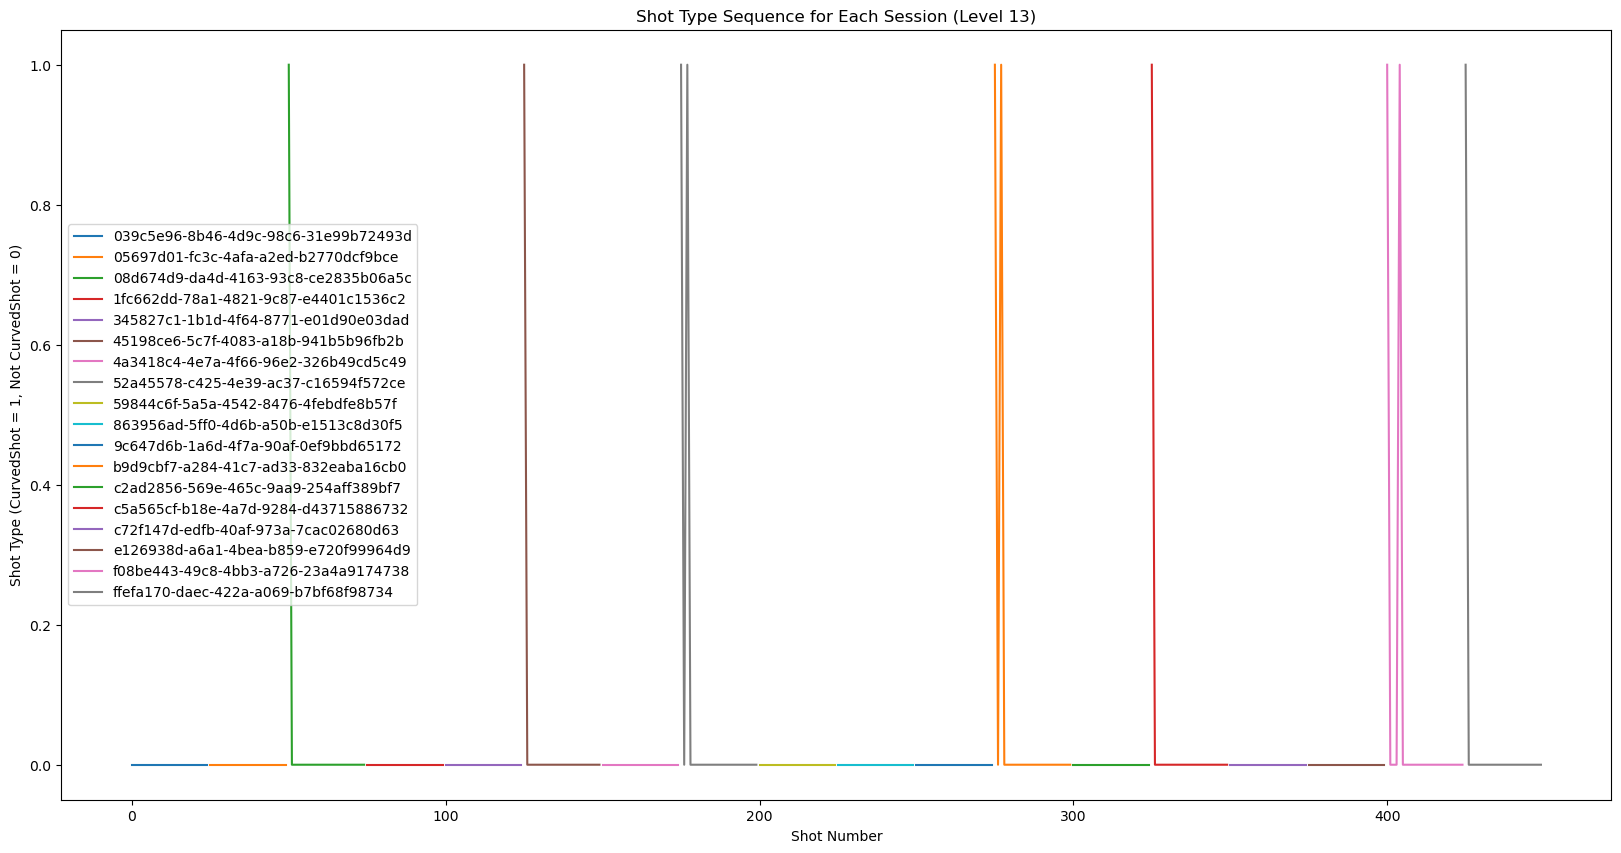

In [20]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# We will plot individual lines for each session
# First, we need to get a list of all unique session IDs
unique_session_ids = shot_sequences_df['SessionID'].unique()

# Set up the plot
plt.figure(figsize=(20, 10))

# Plot a line for each session
for session_id in tqdm(unique_session_ids, desc='Plotting sessions'):
    # Filter the DataFrame for the current session
    session_data = shot_sequences_df[shot_sequences_df['SessionID'] == session_id]
    # Convert 'CurvedShot' to 1 and 'Not CurvedShot' to 0
    session_data['ShotType'] = session_data['ShotType'].map({'CurvedShot': 1, 'Not CurvedShot': 0})
    # Plot
    plt.plot(session_data.index, session_data['ShotType'], label=session_id)

# Finalize the plot
plt.xlabel('Shot Number')
plt.ylabel('Shot Type (CurvedShot = 1, Not CurvedShot = 0)')
plt.title('Shot Type Sequence for Each Session (Level 13)')
plt.legend()
plt.show()